# Lab 0.5 - Manipulating Datasets with Pandas

## Objective
- Install and learn the basics of the `pandas` library.
- Manipulate and analyze datasets, finding basic statistics and adding/removing columns.
- Create data visualizations using `matplotlib`.

## Rubric
- 6 pts - Contains all required components and uses professional language and commenting
- 5 pts - Contains all required components, but uses unprofessional language, commenting, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

# Instructions

Fill in the following code boxes. **Answer the numbered questions in comments next to the code you used to find the answer**.

# Problem 1: Weather Data

We are going to analyze the dataset you created. Use `import pandas as pd` to import the `pandas` library. Then use `df = pd.read_csv("filename.csv")` to create a `DataFrame` called `df`. 

In [197]:
import pandas as pd
df = pd.read_csv("weather.csv")

### `pandas` method reference

- `df.head(x)` and `df.tail(x)` will give you the first or the last `x` number of rows respectively
- `df.describe()` will give you a **five number summary** of the numeric columns
- `df.max()` and `.min()` will with you the maximum and the minimum of the column repectively
- `df[column]` will give you the column specified
- `df.iloc[index]` will give you the row at a given index
- `df.boxplot` will create a box plot of all numeric columns
- `df.sort_values(by=col, ascending=False)`sorts the values of the col in either ascending or descending order


In [198]:
df.shape
df.head()

,datetime,temp_c,temp_f,humidity
0,01/31/25 20:31,21.7,71.1,22.5%
1,01/31/25 20:36,21.3,70.3,22.7%
2,01/31/25 21:01,21.7,71.1,21.9%
3,01/31/25 21:06,21.9,71.4,21.6%
4,01/31/25 21:11,22.1,71.8,21.7%


1. What is the last entry in your table?

In [199]:
df.tail(1)

,datetime,temp_c,temp_f,humidity
784,02/04/25 20:18,21.8,71.2,27.5%


2. What is the average temperature(either outside or inside) over your 40 hour period. What is the lowest temperature? What is the highest temperature? 

In [200]:
high = df["temp_c"].max()
print(f"The highest temp is {high}°c")
low = df["temp_c"].min()
print(f"The lowest temp is {low}°c")
temp_avg = df["temp_c"].mean().round(2)
print(f"The average temp (rounded) is {temp_avg}°c")


The highest temp is 23.0°c
The lowest temp is 19.1°c
The average temp (rounded) is 20.52°c


3. Create a boxplot of the temperatures.

In [201]:
df.boxplot(column="temp_c")

<Axes: >

4. Create a plot of temperature over time with `matplotlib`. 

Import the library with `import matplotlib.pyplot as plt`. The `plot()` method creates a line graphs of temperature over time. Use `plt.plot(df['x_col'],df['y_col'],marker='h')` then `plt.show()` to create your plot of temperature over time. 

Before `plt.show()`, add the following methods to modify your graph. Remember, **good graphs always have axis labels, a title, clear units etc.**

```
plt.xlabel('') # labels the x-axis
plt.ylabel('') # labels the y-axis
plt.title('') # adds a graph title
plt.grid() # adds gridlines
plt.legend() # adds a legend
plt.xticks(rotation=90) # rotates the x-axis tick lables
plt.yticks(rotation=90) # rotates the y-axis tick lables
```

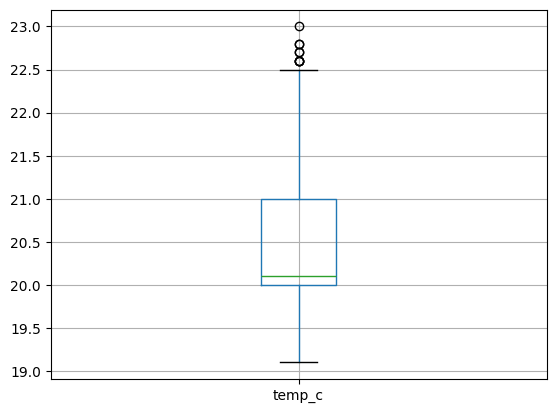

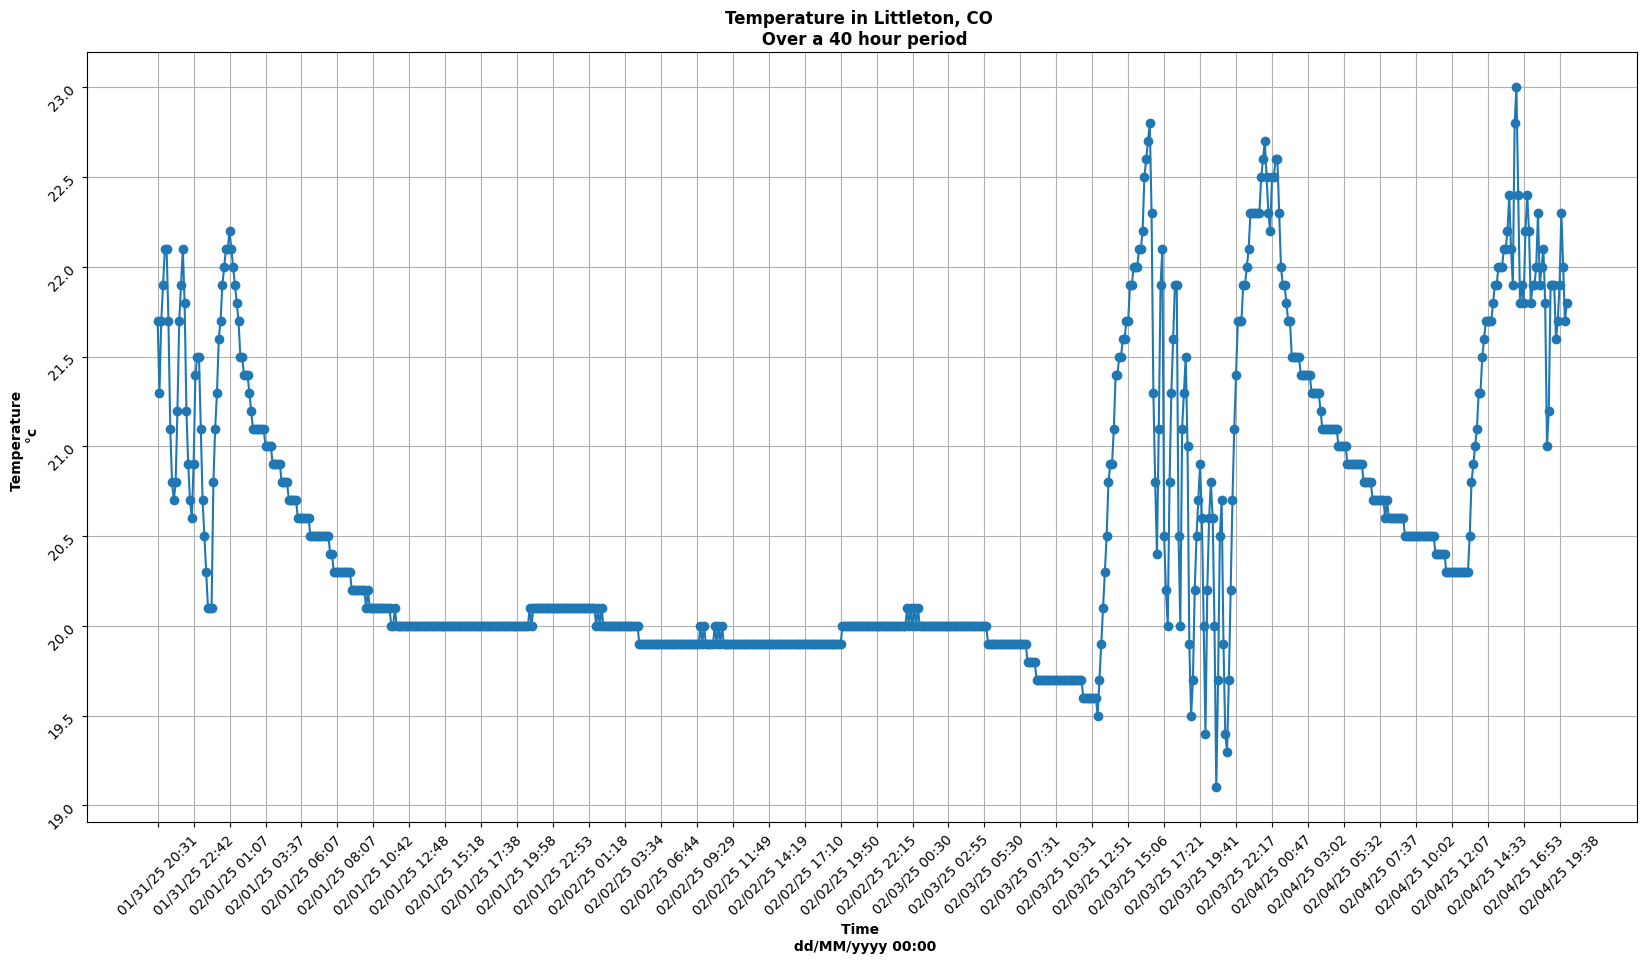

In [202]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 10))
plt.xticks(range(0, len(df["datetime"]), 20), rotation=45)
plt.plot(df['datetime'],df['temp_c'],marker='o')
plt.title("Temperature in Littleton, CO \n Over a 40 hour period", fontweight="bold")
plt.xlabel("Time \n dd/MM/yyyy 00:00", fontweight="bold")
plt.ylabel("Temperature \n °c", fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

5. Define a new column called `kelvin` which is your `celsius` column + 273.15. 

In [203]:
temp_kelvin = []
for temp_k in df["temp_c"]:
    temp_k += 273.15
    temp_kelvin.append(temp_k)


df['temp_k'] = temp_kelvin
df.shape
df.head()

,datetime,temp_c,temp_f,humidity,temp_k
0,01/31/25 20:31,21.7,71.1,22.5%,294.85
1,01/31/25 20:36,21.3,70.3,22.7%,294.45
2,01/31/25 21:01,21.7,71.1,21.9%,294.85
3,01/31/25 21:06,21.9,71.4,21.6%,295.05
4,01/31/25 21:11,22.1,71.8,21.7%,295.25


6. Get the record(row) at 2:30PM 


In [204]:
df['datetime'] = pd.to_datetime(df['datetime'])
row_at_230pm = df[df['datetime'].dt.time == pd.to_datetime("2:30").time()]
print(row_at_230pm)

               datetime  temp_c  temp_f humidity  temp_k
437 2025-02-03 02:30:00    20.0    68.0    28.7%  293.15


/var/folders/y5/bmkcjvhx0fg4k0tmc6d28g1c0000gn/T/ipykernel_86830/3423302593.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'])


# Problem 2: Population Data

In this example we will fetch data about countries and their predicted populations from [Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population).

I have done the web scraping and creation of a `DataFrame`,`df_a`.

In [205]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")

tbody = soup.find_all("tbody")
tr = tbody[0].find_all("tr")
arr = []
mat = []
for t in tr:
    lst = t.text.split("\n")
    for l in lst:
        if l == "":
            if arr != []:
                arr = arr[0:2] + arr[2::2]
                mat.append(arr)
                arr = []
        else:
            try: 
                arr.append(int(l.lstrip('\xa0').replace(",","")))
            except ValueError:
                arr.append(str(l.lstrip('\xa0').replace(",","")))
titles = mat[0]
titles[0] = "countries"
mat = mat[1:]
df_a = pd.DataFrame.from_records(mat, columns=titles) 


1. A 5 number summary of `df_a`

In [206]:
df_a.shape
df_a.head()

,countries,2024,2030,2100
0,World,8118836000,8546141000,22901278109
1,Asia,4785060000,4958807000,12902801109
2,Africa,1494994000,1710666000,3924421000
3,Sub-Saharan Africa,1226534000,1417346000,3442347000
4,Central Asia and South Asia,2128585000,2258687000,2559659000


2. How is the `DataFrame` currently indexed? If it is not already, make the `countries` column the index.

In [207]:
print(df.index[0])

0


The current index of the data set is a number label (starting from 0) of each row

In [208]:
df_a = df_a.set_index("countries")


3. What is the largest population listed for 2030?

In [209]:
max_value = df_a[2030].max()
print(max_value)

8546141000


4. What was the population of Austria from now to 2100?

In [210]:
df_austria = df_a.loc["Austria"]
austria_columns = [2024, 2100]
df_austria = df_austria[austria_columns]
print(df_austria)

2024    9120813
2100    7399328
Name: Austria, dtype: int64


5. What will the population be of France in 2030?

In [211]:
df_france = df_a.loc["France"]
france_2030 = [2030]
df_france = df_france[france_2030]
print(df_france)

2030    65543452
Name: France, dtype: int64


6. What 5 entries will have the highest population in 2100? Display their records.

In [212]:
df_a_2100 = df_a[2100]
top_5_populations_2100 = df_a_2100.sort_values(ascending=False).head()
print(top_5_populations_2100)

countries
World                          22901278109
Asia                           12902801109
Africa                          3924421000
Sub-Saharan Africa              3442347000
Central Asia and South Asia     2559659000
Name: 2100, dtype: int64


7. What was country with the smallest population in 2024?

In [219]:
smallest_2024 = df_a[2024].min()
row_at_smallest_2024 = df_a[df_a[2024] == smallest_2024]
smallest_countrty_2024 = row_at_smallest_2024.index[0]
print(f"The smallest country is {smallest_countrty_2024} - {smallest_2024}")


The smallest country is Vatican City - 526


8. Create a plot with `plot()` to compare the population of Austria, Germany, United States, and France from 2024-2100. Your graph needs to include a  proper title, axis labels, and legend.

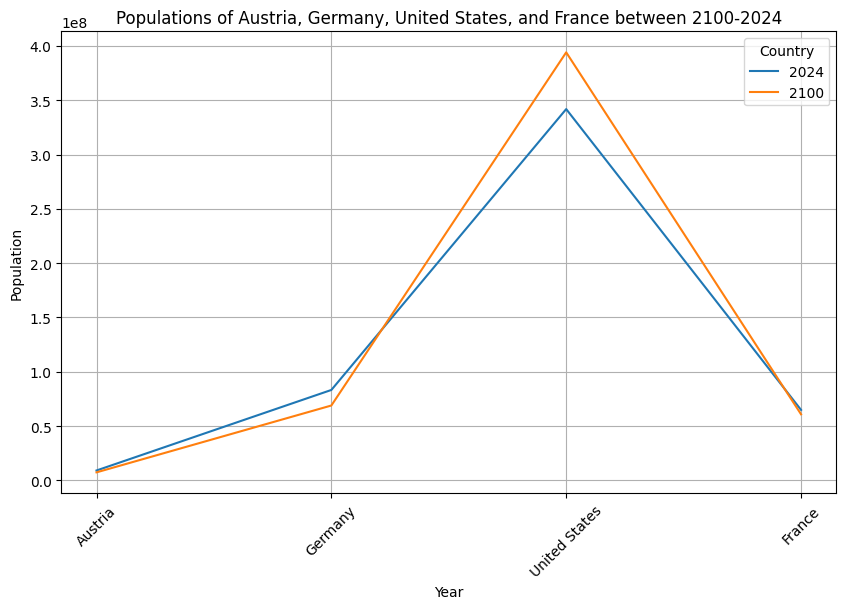

In [223]:
import matplotlib.pyplot as plt 
countries = ["Austria", "Germany", "United States", "France"]
years = [2024, 2100] 
df_selected = df_a.loc[countries, years]  # Filter for selected countries
plt.figure(figsize=(10, 6))
for country in df_selected.columns:
    plt.plot(df_selected.index, df_selected[country], label=country)
plt.title("Populations of Austria, Germany, United States, and France between 2100-2024")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()



In [ ]:
plt.xticks(range(0, len(df["datetime"]), 20), rotation=45)
plt.plot(df['datetime'],df['temp_c'],marker='o')
plt.title("Temperature in Littleton, CO \n Over a 40 hour period", fontweight="bold")
plt.xlabel("Time \n dd/MM/yyyy 00:00", fontweight="bold")
plt.ylabel("Temperature \n °c", fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()